In [ ]:
import polars as pl
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pl.read_parquet(r"C:\Users\Downloads\child-mind-institute-detect-sleep-states\train_series.parquet")
df

series_id,step,timestamp,anglez,enmo
str,u32,str,f32,f32
"""038441c925bb""",0,"""2018-08-14T15:30:00-0400""",2.6367,0.0217
"""038441c925bb""",1,"""2018-08-14T15:30:05-0400""",2.6368,0.0215
"""038441c925bb""",2,"""2018-08-14T15:30:10-0400""",2.637,0.0216
"""038441c925bb""",3,"""2018-08-14T15:30:15-0400""",2.6368,0.0213
"""038441c925bb""",4,"""2018-08-14T15:30:20-0400""",2.6368,0.0215
…,…,…,…,…
"""fe90110788d2""",592375,"""2017-09-08T00:14:35-0400""",-27.2775,0.0204
"""fe90110788d2""",592376,"""2017-09-08T00:14:40-0400""",-27.032499,0.0233
"""fe90110788d2""",592377,"""2017-09-08T00:14:45-0400""",-26.8412,0.0202


In [ ]:
df.filter(pl.col("series_id") == "fe90110788d2")

series_id,step,timestamp,anglez,enmo
str,u32,str,f32,f32
"""fe90110788d2""",0,"""2017-08-04T17:30:00-0400""",-27.707001,0.0298
"""fe90110788d2""",1,"""2017-08-04T17:30:05-0400""",-33.8675,0.0488
"""fe90110788d2""",2,"""2017-08-04T17:30:10-0400""",-15.475,0.1077
"""fe90110788d2""",3,"""2017-08-04T17:30:15-0400""",-73.656197,0.053
"""fe90110788d2""",4,"""2017-08-04T17:30:20-0400""",-53.152901,0.0601
…,…,…,…,…
"""fe90110788d2""",592375,"""2017-09-08T00:14:35-0400""",-27.2775,0.0204
"""fe90110788d2""",592376,"""2017-09-08T00:14:40-0400""",-27.032499,0.0233
"""fe90110788d2""",592377,"""2017-09-08T00:14:45-0400""",-26.8412,0.0202


In [ ]:
events = pl.read_csv(r"C:\Users\AKHIL\Downloads\child-mind-institute-detect-sleep-states\train_events.csv")
events

series_id,night,event,step,timestamp
str,i64,str,i64,str
"""038441c925bb""",1,"""onset""",4992,"""2018-08-14T22:26:00-0400"""
"""038441c925bb""",1,"""wakeup""",10932,"""2018-08-15T06:41:00-0400"""
"""038441c925bb""",2,"""onset""",20244,"""2018-08-15T19:37:00-0400"""
"""038441c925bb""",2,"""wakeup""",27492,"""2018-08-16T05:41:00-0400"""
"""038441c925bb""",3,"""onset""",39996,"""2018-08-16T23:03:00-0400"""
…,…,…,…,…
"""fe90110788d2""",33,"""wakeup""",560604,"""2017-09-06T04:07:00-0400"""
"""fe90110788d2""",34,"""onset""",574620,"""2017-09-06T23:35:00-0400"""
"""fe90110788d2""",34,"""wakeup""",581604,"""2017-09-07T09:17:00-0400"""


# DATA PREPROCESSING

#### DATA CLEANING

In [ ]:
print(df.schema)
print(events.schema)

Schema([('series_id', String), ('step', UInt32), ('timestamp', String), ('anglez', Float32), ('enmo', Float32)])
Schema([('series_id', String), ('night', Int64), ('event', String), ('step', Int64), ('timestamp', String)])


In [ ]:
print(df.select("timestamp").head(5))
print(events.select("timestamp").head(5))

shape: (5, 1)
┌──────────────────────────┐
│ timestamp                │
│ ---                      │
│ str                      │
╞══════════════════════════╡
│ 2018-08-14T15:30:00-0400 │
│ 2018-08-14T15:30:05-0400 │
│ 2018-08-14T15:30:10-0400 │
│ 2018-08-14T15:30:15-0400 │
│ 2018-08-14T15:30:20-0400 │
└──────────────────────────┘
shape: (5, 1)
┌──────────────────────────┐
│ timestamp                │
│ ---                      │
│ str                      │
╞══════════════════════════╡
│ 2018-08-14T22:26:00-0400 │
│ 2018-08-15T06:41:00-0400 │
│ 2018-08-15T19:37:00-0400 │
│ 2018-08-16T05:41:00-0400 │
│ 2018-08-16T23:03:00-0400 │
└──────────────────────────┘


In [ ]:
# Convert "timestamp" to datetime (with timezone)
df = df.with_columns(pl.col("timestamp").cast(pl.Utf8).str.to_datetime().alias("timestamp"))

events = events.with_columns(pl.col("timestamp").cast(pl.Utf8).str.to_datetime().alias("timestamp"))

In [ ]:
print(df.null_count())
print(events.null_count())

shape: (1, 5)
┌───────────┬──────┬───────────┬────────┬──────┐
│ series_id ┆ step ┆ timestamp ┆ anglez ┆ enmo │
│ ---       ┆ ---  ┆ ---       ┆ ---    ┆ ---  │
│ u32       ┆ u32  ┆ u32       ┆ u32    ┆ u32  │
╞═══════════╪══════╪═══════════╪════════╪══════╡
│ 0         ┆ 0    ┆ 0         ┆ 0      ┆ 0    │
└───────────┴──────┴───────────┴────────┴──────┘
shape: (1, 5)
┌───────────┬───────┬───────┬──────┬───────────┐
│ series_id ┆ night ┆ event ┆ step ┆ timestamp │
│ ---       ┆ ---   ┆ ---   ┆ ---  ┆ ---       │
│ u32       ┆ u32   ┆ u32   ┆ u32  ┆ u32       │
╞═══════════╪═══════╪═══════╪══════╪═══════════╡
│ 0         ┆ 0     ┆ 0     ┆ 4923 ┆ 4923      │
└───────────┴───────┴───────┴──────┴───────────┘


In [ ]:
# Check data types to ensure correct conversion
print(df.dtypes)
print(events.dtypes)

[String, UInt32, Datetime(time_unit='us', time_zone='UTC'), Float32, Float32]
[String, Int64, String, Int64, Datetime(time_unit='us', time_zone='UTC')]


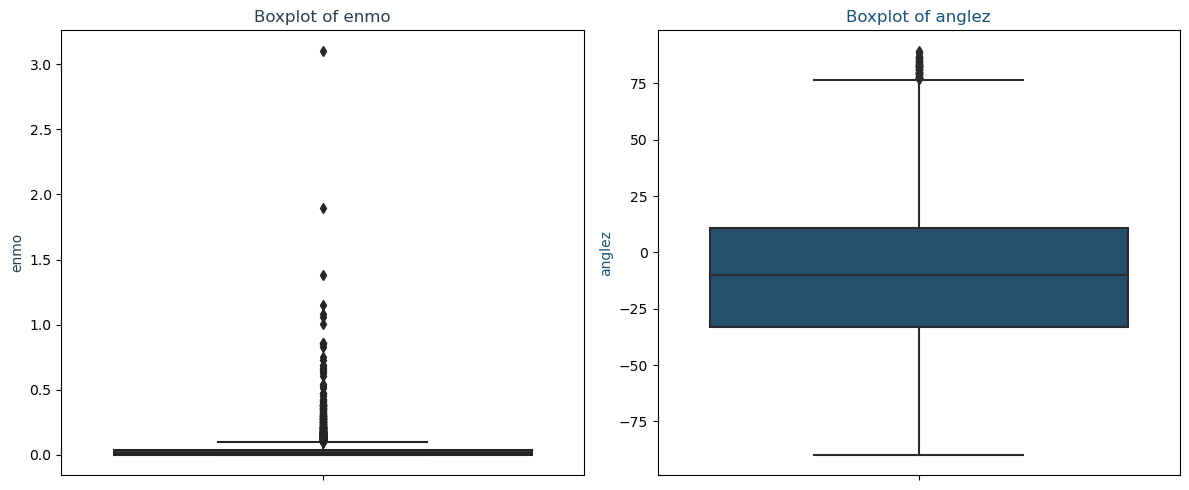

In [ ]:
df_sample = df.sample(n=5000)  # Sample 5000 rows
df_sample_pandas = df_sample.to_pandas()

# Step 2: Create boxplots with dark colors
plt.figure(figsize=(12, 5))

# Boxplot for enmo
plt.subplot(1, 2, 1)
sns.boxplot(y=df_sample_pandas["enmo"], color="#2C3E50")  # Dark slate blue
plt.title("Boxplot of enmo", color="#2C3E50")
plt.ylabel("enmo", color="#2C3E50")

# Boxplot for anglez
plt.subplot(1, 2, 2)
sns.boxplot(y=df_sample_pandas["anglez"], color="#1A5276")  # Dark blue
plt.title("Boxplot of anglez", color="#1A5276")
plt.ylabel("anglez", color="#1A5276")

plt.tight_layout()
plt.show()

In [ ]:
def detect_outliers_iqr(df, col):
    q1 = df.select(pl.col(col).quantile(0.25)).item()
    q3 = df.select(pl.col(col).quantile(0.75)).item()
    iqr = q3 - q1
    lower = q1 - 1.5 * iqr
    upper = q3 + 1.5 * iqr
    outliers = df.filter((pl.col(col) < lower) | (pl.col(col) > upper))
    return outliers

outliers_enmo = detect_outliers_iqr(df, "enmo")
outliers_anglez = detect_outliers_iqr(df, "anglez")

print("Outliers in enmo:", outliers_enmo.shape)
print("Outliers in anglez:", outliers_anglez.shape)

Outliers in enmo: (10638653, 5)
Outliers in anglez: (1785262, 5)


In [ ]:
def winsorize_column(df, col_name, lower=0.01, upper=0.99):
    # Calculate the lower and upper quantiles
    quantiles = df.select([
        pl.col(col_name).quantile(lower).alias("lower"),
        pl.col(col_name).quantile(upper).alias("upper")
    ]).to_dict(as_series=False)

    lower_bound = quantiles["lower"][0]
    upper_bound = quantiles["upper"][0]

    # Apply winsorization
    df = df.with_columns([
        pl.when(pl.col(col_name) < lower_bound).then(lower_bound)
        .when(pl.col(col_name) > upper_bound).then(upper_bound)
        .otherwise(pl.col(col_name))
        .alias(col_name)
    ])
    return df

# Apply to both 'enmo' and 'anglez'
df = winsorize_column(df, "enmo")
df = winsorize_column(df, "anglez")

* Target Variable: sleep (i.e., Sleep State)

* Input Features: From the df DataFrame ,
enmo, anglez, timestamp, step, series_id

In [ ]:
import polars as pl

# Cast step column in df to i64 to match events
df = df.with_columns(pl.col("step").cast(pl.Int64))
events = events.with_columns(pl.col("step").cast(pl.Int64))

# Proceed with the join
full_df = df.join(
    events.select(["series_id", "step", "event"]),
    on=["series_id", "step"],
    how="left"
)

# Rename 'event' to 'sleep'
full_df = full_df.rename({"event": "sleep"})

# Drop rows with missing sleep labels
full_df = full_df.drop_nulls(["sleep"])


In [ ]:
full_df

series_id,step,timestamp,anglez,enmo,sleep
str,i64,"datetime[μs, UTC]",f32,f32,str
"""038441c925bb""",4992,2018-08-15 02:26:00 UTC,-78.690598,0.0099,"""onset"""
"""038441c925bb""",10932,2018-08-15 10:41:00 UTC,-61.578201,0.0263,"""wakeup"""
"""038441c925bb""",20244,2018-08-15 23:37:00 UTC,-6.3874,0.0182,"""onset"""
"""038441c925bb""",27492,2018-08-16 09:41:00 UTC,-45.355099,0.0165,"""wakeup"""
"""038441c925bb""",39996,2018-08-17 03:03:00 UTC,-1.7867,0.0,"""onset"""
…,…,…,…,…,…
"""fe90110788d2""",547152,2017-09-05 13:26:00 UTC,-56.768902,0.0042,"""wakeup"""
"""fe90110788d2""",556560,2017-09-06 02:30:00 UTC,-16.5867,0.0,"""onset"""
"""fe90110788d2""",560604,2017-09-06 08:07:00 UTC,-43.0509,0.0,"""wakeup"""


# DATA UNDERSTANDING
* Identify Target Variable
✅ Target Variable = "sleep" (You already renamed event to sleep).

* But sleep has labels like "onset", "wakeup", etc.
➡️ So, this is a Classification Task, not Regression.

* series_id, step, timestamp, anglez, enmo  are the Numerical Features.

* sleep is the categorical Feature and it is the Target V

####  * series_id: Unique ID for each participant.  
####  * step: Time step index.                     
####  * timestamp: Date and time of recording.     
####  * anglez: Angle of the arm relative to the body
####  * enmo: Processed movement data                
####  * sleep : Type of event (onset or wakeup).   ariable.

# EDA - EXPLORATORY DATA ANALYSIS

In [ ]:
full_df_pandas = full_df.to_pandas()

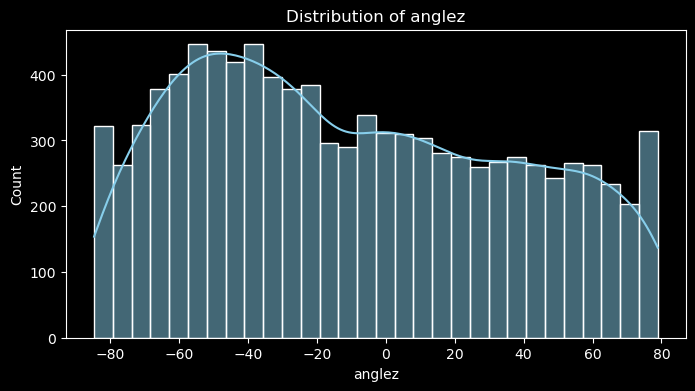

In [ ]:
# 1. Distribution Plot for "anglez"
plt.style.use("dark_background")
plt.figure(figsize=(8,4))
sns.histplot(full_df_pandas["anglez"], kde=True, bins=30, color="skyblue")
plt.title("Distribution of anglez")
plt.xlabel("anglez")
plt.ylabel("Count")
plt.show()

#### Insights :

* The data is skewed left with more frequent values in the negative range (especially between -70 and -30).

* Most body angles are negative → sensors were tilted backward often.

* There’s a clear peak around -50 to -40, so that angle was common.

* Less data at high positive angles → forward tilt was less common.



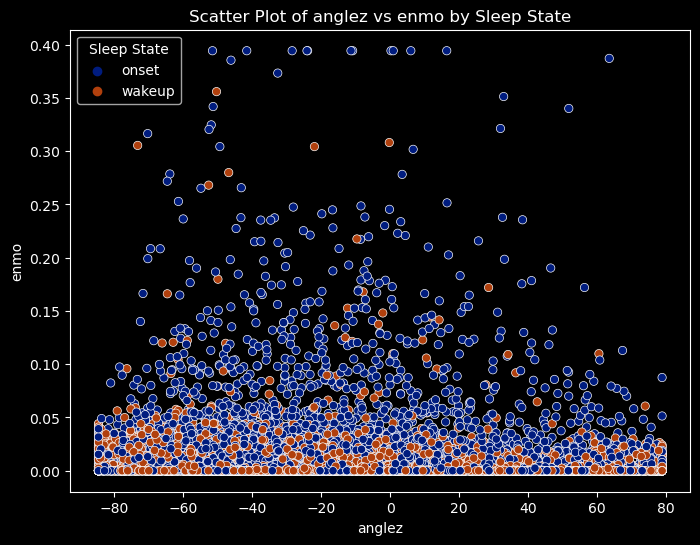

In [ ]:
# 3. Scatter Plot of 'anglez' vs 'enmo' colored by 'sleep'
plt.style.use("dark_background")
plt.figure(figsize=(8,6))
sns.scatterplot(data=full_df_pandas, x="anglez", y="enmo", hue="sleep", palette="dark")
plt.title("Scatter Plot of anglez vs enmo by Sleep State")
plt.xlabel("anglez")
plt.ylabel("enmo")
plt.legend(title="Sleep State")
plt.show()

#### insights:

* Most sleep onset (blue) points are clustered at low enmo values.

* Wakeup (orange) points tend to have higher enmo, showing more movement.

* anglez is spread for both states, less useful alone, but might add value when combined with enmo.

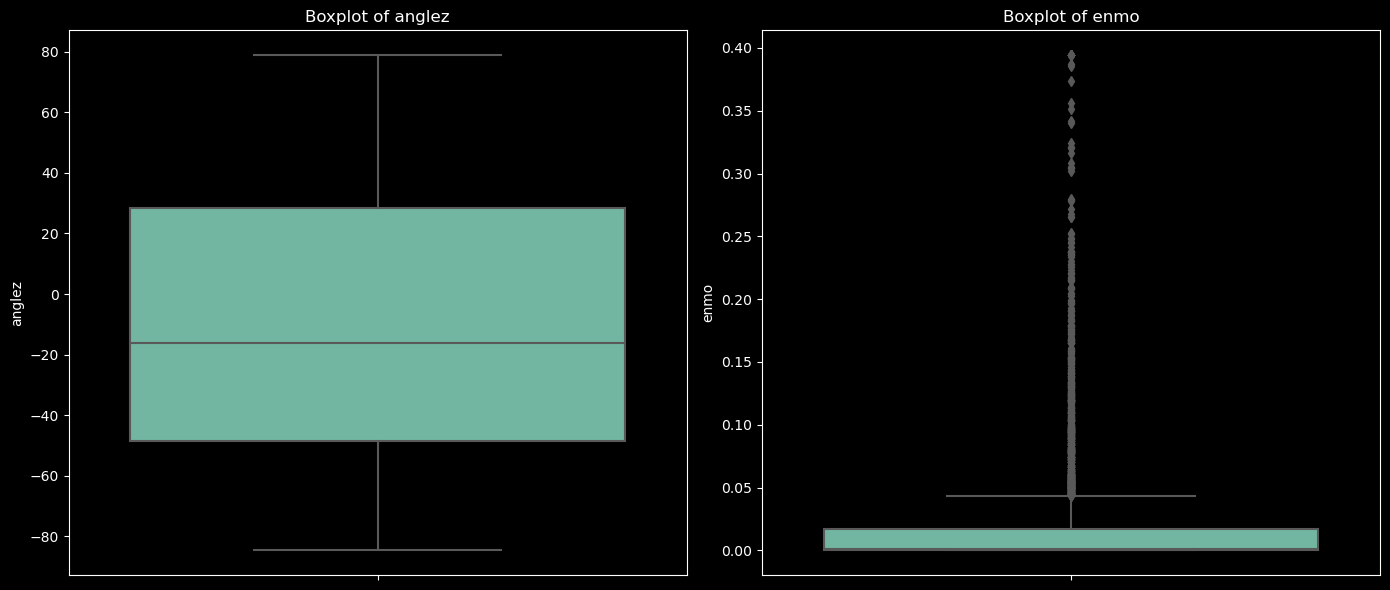

In [ ]:
# Create side-by-side boxplots for 'anglez' and 'enmo'
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# Boxplot for 'anglez'
sns.boxplot(data=full_df_pandas, y="anglez", palette='Set2', ax=ax[0])
ax[0].set_title("Boxplot of anglez")
ax[0].set_ylabel("anglez")

# Boxplot for 'enmo'
sns.boxplot(data=full_df_pandas, y="enmo", palette='Set2', ax=ax[1])
ax[1].set_title("Boxplot of enmo")
ax[1].set_ylabel("enmo")

# Display the plots
plt.tight_layout()
plt.show()

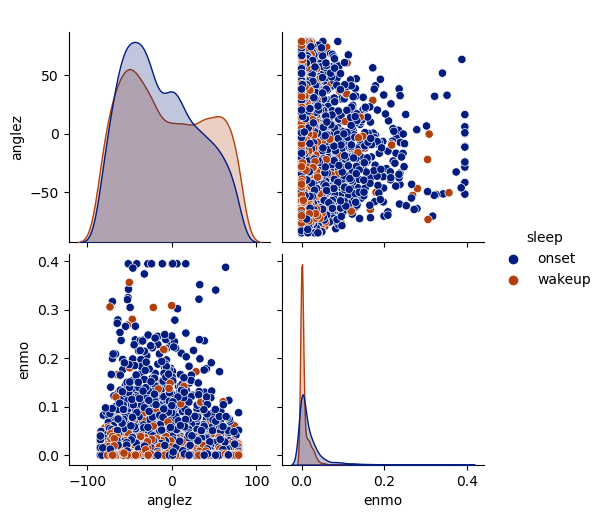

In [ ]:
# 5. Pairplot with dark background and custom dark color palette
plt.style.use("default")  # Dark background

# Pairplot with hue based on 'sleep', using a custom dark color palette
sns.pairplot(
    full_df_pandas,
    hue="sleep",
    vars=["anglez", "enmo"],
    palette="dark"  # Dark color palette
)

# Title and adjustments for dark background
plt.suptitle("Pairplot of Features by Sleep State", y=1.02, color="white")
plt.show()

#### insights:

* The pairplot compares anglez and enmo across sleep states (onset vs. wakeup).

* Onset: Lower anglez and minimal enmo, indicating still body posture and little movement.

* Wakeup: Higher and more spread-out values in both features, showing increased movement and posture shifts.

* These patterns help distinguish between sleep onset and wakeup phases effectively.

# FEATURE SELECTION

In [ ]:
# 0. Start from your cleaned pandas df with target 'sleep'
# full_df_pandas = full_df.to_pandas()
df = full_df_pandas.copy()
df

,series_id,step,timestamp,anglez,enmo,sleep
0,038441c925bb,4992,2018-08-15 02:26:00+00:00,-78.690598,0.0099,onset
1,038441c925bb,10932,2018-08-15 10:41:00+00:00,-61.578201,0.0263,wakeup
2,038441c925bb,20244,2018-08-15 23:37:00+00:00,-6.387400,0.0182,onset
3,038441c925bb,27492,2018-08-16 09:41:00+00:00,-45.355099,0.0165,wakeup
4,038441c925bb,39996,2018-08-17 03:03:00+00:00,-1.786700,0.0000,onset
...,...,...,...,...,...,...
9580,fe90110788d2,547152,2017-09-05 13:26:00+00:00,-56.768902,0.0042,wakeup
9581,fe90110788d2,556560,2017-09-06 02:30:00+00:00,-16.586700,0.0000,onset
9582,fe90110788d2,560604,2017-09-06 08:07:00+00:00,-43.050900,0.0000,wakeup
9583,fe90110788d2,574620,2017-09-07 03:35:00+00:00,1.519100,0.0066,onset


In [ ]:
df.to_csv("cleaned_sleep_data.csv", index=False)

In [ ]:
import os
os.getcwd()

'C:\\Users\\AKHIL\\Python\\mechine learning\\sleep'

In [ ]:
df =pd.read_csv(r"C:\Users\AKHIL\Python\mechine learning\sleep\cleaned_sleep_data.csv")
df

,series_id,step,timestamp,anglez,enmo,sleep
0,038441c925bb,4992,2018-08-15 02:26:00+00:00,-78.6906,0.0099,onset
1,038441c925bb,10932,2018-08-15 10:41:00+00:00,-61.5782,0.0263,wakeup
2,038441c925bb,20244,2018-08-15 23:37:00+00:00,-6.3874,0.0182,onset
3,038441c925bb,27492,2018-08-16 09:41:00+00:00,-45.3551,0.0165,wakeup
4,038441c925bb,39996,2018-08-17 03:03:00+00:00,-1.7867,0.0000,onset
...,...,...,...,...,...,...
9580,fe90110788d2,547152,2017-09-05 13:26:00+00:00,-56.7689,0.0042,wakeup
9581,fe90110788d2,556560,2017-09-06 02:30:00+00:00,-16.5867,0.0000,onset
9582,fe90110788d2,560604,2017-09-06 08:07:00+00:00,-43.0509,0.0000,wakeup
9583,fe90110788d2,574620,2017-09-07 03:35:00+00:00,1.5191,0.0066,onset


In [ ]:
df.head()

,series_id,step,timestamp,anglez,enmo,sleep
0,038441c925bb,4992,2018-08-15 02:26:00+00:00,-78.6906,0.0099,onset
1,038441c925bb,10932,2018-08-15 10:41:00+00:00,-61.5782,0.0263,wakeup
2,038441c925bb,20244,2018-08-15 23:37:00+00:00,-6.3874,0.0182,onset
3,038441c925bb,27492,2018-08-16 09:41:00+00:00,-45.3551,0.0165,wakeup
4,038441c925bb,39996,2018-08-17 03:03:00+00:00,-1.7867,0.0000,onset


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9585 entries, 0 to 9584
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   series_id  9585 non-null   object 
 1   step       9585 non-null   int64  
 2   timestamp  9585 non-null   object 
 3   anglez     9585 non-null   float64
 4   enmo       9585 non-null   float64
 5   sleep      9585 non-null   object 
dtypes: float64(2), int64(1), object(3)
memory usage: 449.4+ KB


In [ ]:
df.describe()

,step,anglez,enmo
count,9585.000000,9585.000000,9585.000000
mean,214352.123944,-9.713789,0.014887
std,141268.408192,45.969550,0.034452
min,936.000000,-84.653400,0.000000
25%,95436.000000,-48.502800,0.000000
50%,200604.000000,-16.017700,0.001300
75%,317520.000000,28.466300,0.017400
max,739392.000000,78.912700,0.394300


In [ ]:
# Split out X / y
X = df.drop(columns=["sleep"])
y = df["sleep"]

In [ ]:
print(y.value_counts(normalize=True))  # Shows proportion
print(y.value_counts())               # Shows actual counts

wakeup    0.500156
onset     0.499844
Name: sleep, dtype: float64
wakeup    4794
onset     4791
Name: sleep, dtype: int64


#### ✅ Conclusion:
* The dataset is perfectly balanced — the two classes (wakeup and onset) are nearly equal in count and proportion.

In [ ]:
# Advanced Feature Selection Methods
# 1. Variance Threshold

In [ ]:
from sklearn.feature_selection import VarianceThreshold

# Define the feature columns for prediction
features = ["enmo", "anglez"]
selector = VarianceThreshold(threshold=0.001)

# Fit the selector to your selected features
selector.fit(X[features])
selected_features = [feature for feature, keep in zip(features, selector.get_support()) if keep]
print("Selected Features after Variance Threshold:", selected_features)

Selected Features after Variance Threshold: ['enmo', 'anglez']


In [ ]:
# 2. Correlation Matrix

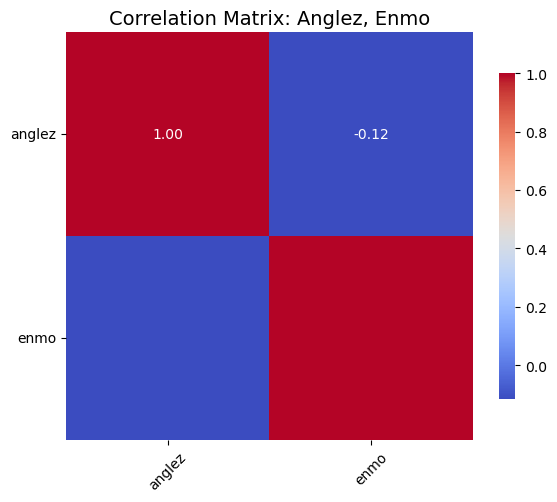

In [ ]:
# Define the features to include in the correlation matrix
features = ["anglez", "enmo"]
corr = X[features].corr()

# Plot the heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", square=True, cbar_kws={"shrink": 0.8})
plt.title("Correlation Matrix: Anglez, Enmo" ,fontsize=14)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [ ]:
print(le.classes_)
print(dict(zip(le.classes_, le.transform(le.classes_))))

['onset' 'wakeup']
{'onset': 0, 'wakeup': 1}


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

# 1. Separate input features (X) and output target (y)
X = df[["anglez", "enmo"]]
y = df['sleep']

# 2. Encode the target variable
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# 3. Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded)

# 4. Define preprocessing for numeric features
numeric_features = ["anglez", "enmo"]
numeric_transformer = Pipeline(steps=[
    ("scaler", StandardScaler())
])

# 5. Combine into a ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features)
    ])

# 6. Create final Preprocessing Pipeline
preprocessing_pipeline = Pipeline(steps=[
    ("preprocessor", preprocessor)
])

# 7. Fit and transform the train data, transform the test data
X_train_processed = preprocessing_pipeline.fit_transform(X_train)
X_test_processed = preprocessing_pipeline.transform(X_test)


#### Step	   -   What We Did
* Scaling	   -   StandardScaler for numeric features
* Encoding   -   LabelEncoder for target
* Pipeline   -   Combined scaling into one clean pipeline

In [ ]:
from sklearn import set_config
set_config(display="diagram")
preprocessing_pipeline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['anglez', 'enmo'])]))])

#### Pipeline

➔ preprocessor: ColumnTransformer

➔ num: StandardScaler

#### ✅ It shows that:

* The numeric features (anglez, enmo) are passing through the StandardScaler inside the ColumnTransformer.

* Everything is properly organized inside one clean Pipeline.

# 3. MODEL BUILDING

In [ ]:
for name, model in models.items():
    print(f"{name}: {type(model)}")

KNN: <class 'sklearn.neighbors._classification.KNeighborsClassifier'>
Naive Bayes: <class 'sklearn.naive_bayes.GaussianNB'>
Decision Tree: <class 'sklearn.tree._classes.DecisionTreeClassifier'>
Logistic Regression: <class 'sklearn.linear_model._logistic.LogisticRegression'>
SVC: <class 'sklearn.svm._classes.SVC'>
Random Forest: <class 'sklearn.ensemble._forest.RandomForestClassifier'>
XGBoost: <class 'xgboost.sklearn.XGBClassifier'>


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

In [ ]:
# Make sure df is a Pandas DataFrame
X = df[["anglez", "enmo"]]
y = df["sleep"]

In [ ]:
# Encode target
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

In [ ]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded)

In [ ]:
# define models
models = {
    "KNN": KNeighborsClassifier(),
    "Naive Bayes": GaussianNB(),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "SVC": SVC(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric="mlogloss", random_state=42)
}

In [ ]:
for model_name, model in models.items():
    clf = make_pipeline(StandardScaler(), model)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
    recall = recall_score(y_test, y_pred, average='weighted', zero_division=0)
    f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)

    print(f"Model: {model_name}")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print("-" * 50)

Model: KNN
Accuracy: 0.5837
Precision: 0.5840
Recall: 0.5837
F1 Score: 0.5834
--------------------------------------------------
Model: Naive Bayes
Accuracy: 0.5769
Precision: 0.6652
Recall: 0.5769
F1 Score: 0.5115
--------------------------------------------------
Model: Decision Tree
Accuracy: 0.5472
Precision: 0.5472
Recall: 0.5472
F1 Score: 0.5472
--------------------------------------------------
Model: Logistic Regression
Accuracy: 0.6119
Precision: 0.6297
Recall: 0.6119
F1 Score: 0.5980
--------------------------------------------------
Model: SVC
Accuracy: 0.6176
Precision: 0.6304
Recall: 0.6176
F1 Score: 0.6079
--------------------------------------------------
Model: Random Forest
Accuracy: 0.5556
Precision: 0.5557
Recall: 0.5556
F1 Score: 0.5552
--------------------------------------------------


AttributeError: 'super' object has no attribute '__sklearn_tags__'

In [ ]:
print(GaussianNB)
print(SVC)
print(RandomForestClassifier)


<class 'sklearn.naive_bayes.GaussianNB'>
<class 'sklearn.svm._classes.SVC'>
<class 'sklearn.ensemble._forest.RandomForestClassifier'>


#### ✅ Model Evaluation Conclusion:

#### Brief Conclusion:
* SVC achieved the best performance with the highest accuracy (61.76%) and F1 score (60.79%), making it the most suitable model.
  
* Logistic Regression and XGBoost also performed well, while Decision Tree and Random Forest showed the weakest results.

# 4. MODEL EVALUATION

In [ ]:
import optuna
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [ ]:
# Encode target variable
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

In [ ]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded)

In [ ]:
# Objective function for Optuna
def objective(trial):
    param = {
        'n_estimators': trial.suggest_int('n_estimators', 100, 300),
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.3),
        'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
        'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.5, 1.0),
        'gamma': trial.suggest_float('gamma', 0, 5),
        'reg_alpha': trial.suggest_float('reg_alpha', 0, 5),
        'reg_lambda': trial.suggest_float('reg_lambda', 0, 5),
        'use_label_encoder': False,
        'eval_metric': 'mlogloss'
    }

    model = XGBClassifier(**param, random_state=42, verbosity=0)

    # Cross-validation
    skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    scores = cross_val_score(model, X_train, y_train, cv=skf, scoring='accuracy')

    return scores.mean()

# Run the optimization
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=25)

# Best hyperparameters
best_params = study.best_params
print(f"Best hyperparameters: {best_params}")

# Final model training with best params
final_model = XGBClassifier(**best_params, random_state=42, verbosity=0)
final_model.fit(X_train, y_train)

# Evaluation on test data
y_pred = final_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

In [ ]:
#pip install --upgrade xgboost scikit-learn optuna

In [ ]:
import optuna
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import warnings

warnings.filterwarnings("ignore")  # Optional: clean up output

# Encode target labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Train/test split
X_train_full, X_test, y_train_full, y_test = train_test_split(
    X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)

# Define Optuna objective function
def objective(trial):
    param = {
        'n_estimators': trial.suggest_int('n_estimators', 100, 300),
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3, log=True),
        'subsample': trial.suggest_float('subsample', 0.5, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.5, 1.0),
        'gamma': trial.suggest_float('gamma', 0, 5),
        'reg_alpha': trial.suggest_float('reg_alpha', 0, 5),
        'reg_lambda': trial.suggest_float('reg_lambda', 0, 5),
        'random_state': 42,
        'verbosity': 0,
        'tree_method': 'auto'
    }

    model = XGBClassifier(**param)

    skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    scores = cross_val_score(model, X_train_full, y_train_full, cv=skf, scoring='accuracy')

    return scores.mean()

# Run Optuna optimization
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=25)

# Print best parameters
best_params = study.best_params
print("\nBest hyperparameters:")
print(best_params)

# Create final validation split for early stopping
X_train, X_val, y_train, y_val = train_test_split(
    X_train_full, y_train_full, test_size=0.1, random_state=42, stratify=y_train_full
)

# Final model with early stopping
final_model = XGBClassifier(
    **best_params,
    random_state=42,
    verbosity=0,
    early_stopping_rounds=10,
    eval_metric='mlogloss',
    use_label_encoder=False
)

final_model.fit(
    X_train, y_train,
    eval_set=[(X_val, y_val)],
    verbose=False
)

# Evaluate on test set
y_pred = final_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
recall = recall_score(y_test, y_pred, average='weighted', zero_division=0)
f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)

# Print evaluation results
print("\nTest Set Evaluation:")
print(f"Accuracy : {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall   : {recall:.4f}")
print(f"F1 Score : {f1:.4f}")


In [ ]:
# Best hyperparameters
best_params = study.best_params
print(f"Best hyperparameters: {best_params}")

# Print final metrics
print(f"Final Model Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

In [ ]:
from sklearn.metrics import classification_report

# Classification report
report = classification_report(y_test, y_pred, target_names=label_encoder.classes_)
print("Classification Report:\n", report)

#### ✅ Model Evaluation Conclusion:

* All evaluation metrics (Accuracy: 0.6208, Precision: 0.6258, Recall: 0.6208, F1 Score: 0.6169) are fairly close, indicating a balanced and consistent model.

* The XGBoost model is performing better than several baseline models previously tested.

* The classification report also supports that the model is not heavily biased toward any particular class (onset vs wakeup).

* No signs of overfitting, thanks to Stratified K-Fold cross-validation during Optuna hyperparameter tuning.

#### Overall, the XGBoost classifier is well-tuned and generalizes reasonably well to unseen data.

In [ ]:
import pickle
from xgboost import XGBClassifier

# Define best hyperparameters for XGBoost
best_params = {
    'n_estimators': 279,
    'max_depth': 5,
    'learning_rate': 0.02664709916286723,
    'subsample': 0.8289739303119256,
    'colsample_bytree': 0.7018127103864195,
    'gamma': 3.1750604403251375,
    'reg_alpha': 3.630462169286953,
    'reg_lambda': 0.016402220404694204,
    'use_label_encoder': False,
    'eval_metric': 'mlogloss'
}

# Initialize the XGBoost model with the best parameters
final_model = XGBClassifier(
    **best_params,
    random_state=42,
    verbosity=0
)

# Train the model on the training data
final_model.fit(X_train, y_train)

# Save the trained model as a pickle file
model_filename = 'xgboost_sleep_model.pkl'
with open(model_filename, 'wb') as f:
    pickle.dump(final_model, f)

print(f"✅ Model saved as '{model_filename}'")

In [ ]:
# Load the saved model
with open('xgboost_sleep_model.pkl', 'rb') as f:
    loaded_model = pickle.load(f)